In [120]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import io
import requests

In [121]:
CONFIRMED_CONTENT = requests.get('https://raw.githubusercontent.com/Kkesha/omd/main/Metrics/orders.csv').content
orders = pd.read_csv(io.StringIO(CONFIRMED_CONTENT.decode('utf-8')))

In [122]:
orders.head()

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376


In [51]:
orders.columns

Index(['id', 'order_date', 'ship_mode', 'customer_id', 'sales'], dtype='object')

Чистим данные

In [52]:
orders.drop_duplicates(inplace=True)
orders=orders[(orders.customer_id.notnull()) & (orders.sales != 0)]

In [53]:
orders['order_date'] = pd.to_datetime(orders['order_date'],infer_datetime_format=True)
orders['order_month'] = orders['order_date'].dt.strftime('%Y-%m') 

Каждый год запишем в отдельный датафрейм и проведем когортный анализ

In [54]:
orders_2014 = orders[orders['order_date'].dt.strftime('%Y') =='2014']
orders_2015 = orders[orders['order_date'].dt.strftime('%Y') =='2015']
orders_2016 = orders[orders['order_date'].dt.strftime('%Y') =='2016']
orders_2017 = orders[orders['order_date'].dt.strftime('%Y') =='2017']

In [55]:
cohorts_2014= orders_2014.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2014.columns = ['customer_id', 'cohorts']
cohorts_2014.head()

,customer_id,cohorts
0,AA-10315,2014-03
1,AA-10375,2014-04
2,AA-10480,2014-05
3,AA-10645,2014-06
4,AB-10015,2014-02


In [56]:
df_2014= pd.merge(orders_2014, cohorts_2014 , how='left', on='customer_id')
df_2014.head()

,id,order_date,ship_mode,customer_id,sales,order_month,cohorts
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014-09
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014-07
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014-03
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014-01
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014-04


In [57]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df)) 
    return df

In [62]:
cohorts_group_2014 = df_2014.groupby(['cohorts', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2014.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2014 = cohorts_group_2014.groupby(level=0).apply(cohort_period)
cohorts_group_2014.reset_index(inplace=True)
cohorts_group_2014.set_index(['cohorts', 'CohortPeriod'], inplace=True) 
cohort_group_size_2014 = cohorts_group_2014['TotalUsers'].groupby(level=0).first()
user_retention_2014 = cohorts_group_2014['TotalUsers'].unstack(0).divide(cohort_group_size_2014, axis=1)

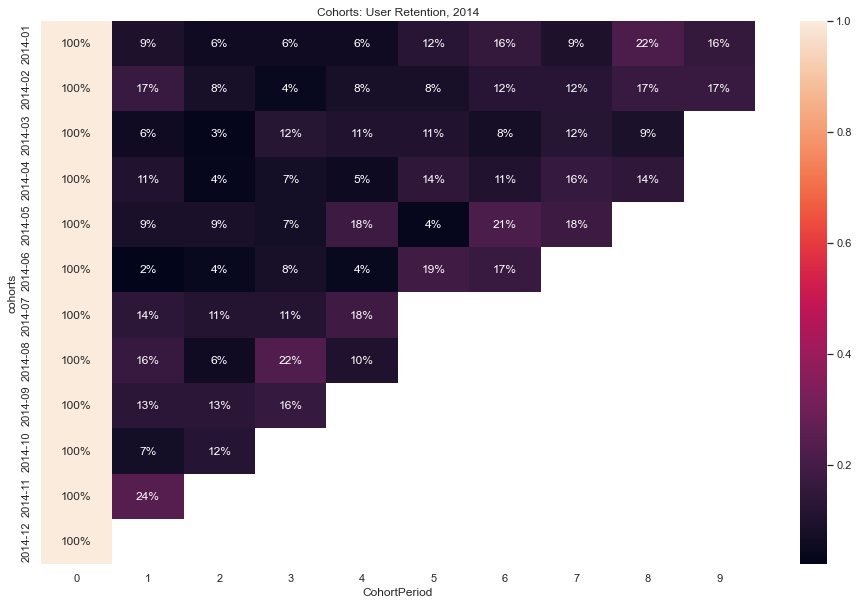

In [65]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention, 2014')
sns.heatmap(user_retention_2014.T, mask=user_retention_2014.T.isnull(), annot=True, fmt='.0%');

2015 год

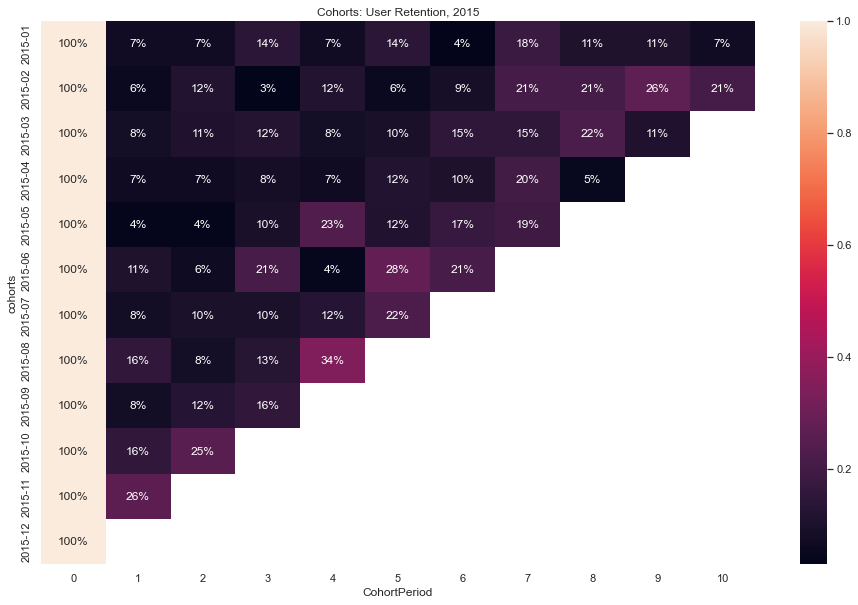

In [67]:
cohorts_2015= orders_2015.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2015.columns = ['customer_id', 'cohorts']
df_2015 = pd.merge(orders_2015, cohorts_2015 , how='left', on='customer_id')
cohorts_group_2015 = df_2015.groupby(['cohorts', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2015.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2015 = cohorts_group_2015.groupby(level=0).apply(cohort_period)
cohorts_group_2015.reset_index(inplace=True)
cohorts_group_2015.set_index(['cohorts', 'CohortPeriod'], inplace=True) 
cohort_group_size_2015 = cohorts_group_2015['TotalUsers'].groupby(level=0).first()
user_retention_2015 = cohorts_group_2015['TotalUsers'].unstack(0).divide(cohort_group_size_2015, axis=1)
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention, 2015')
sns.heatmap(user_retention_2015.T, mask=user_retention_2015.T.isnull(), annot=True, fmt='.0%');

2016 год

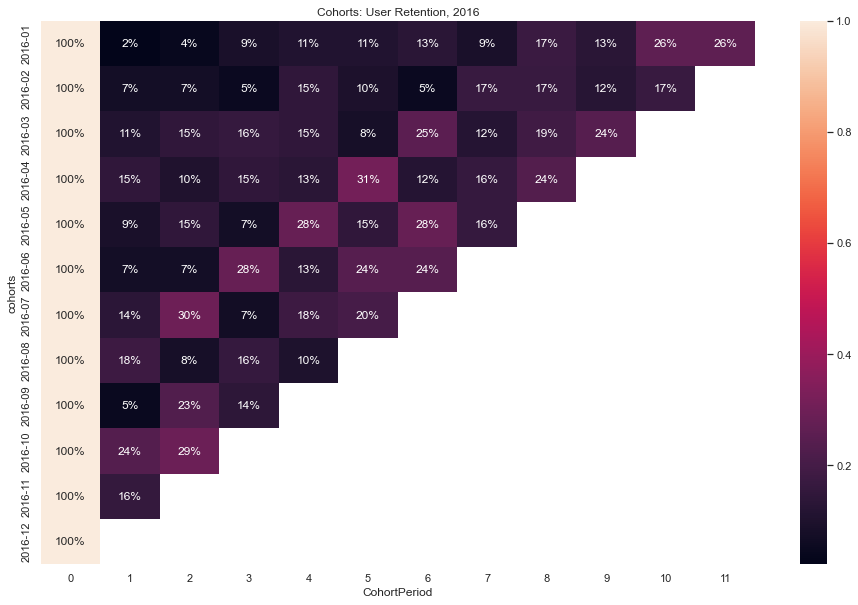

In [68]:
cohorts_2016= orders_2016.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2016.columns = ['customer_id', 'cohorts']
df_2016 = pd.merge(orders_2016, cohorts_2016 , how='left', on='customer_id')
cohorts_group_2016 = df_2016.groupby(['cohorts', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2016.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2016 = cohorts_group_2016.groupby(level=0).apply(cohort_period)
cohorts_group_2016.reset_index(inplace=True)
cohorts_group_2016.set_index(['cohorts', 'CohortPeriod'], inplace=True) 
cohort_group_size_2016 = cohorts_group_2016['TotalUsers'].groupby(level=0).first()
user_retention_2016 = cohorts_group_2016['TotalUsers'].unstack(0).divide(cohort_group_size_2016, axis=1)
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention, 2016')
sns.heatmap(user_retention_2016.T, mask=user_retention_2016.T.isnull(), annot=True, fmt='.0%');

2017 год

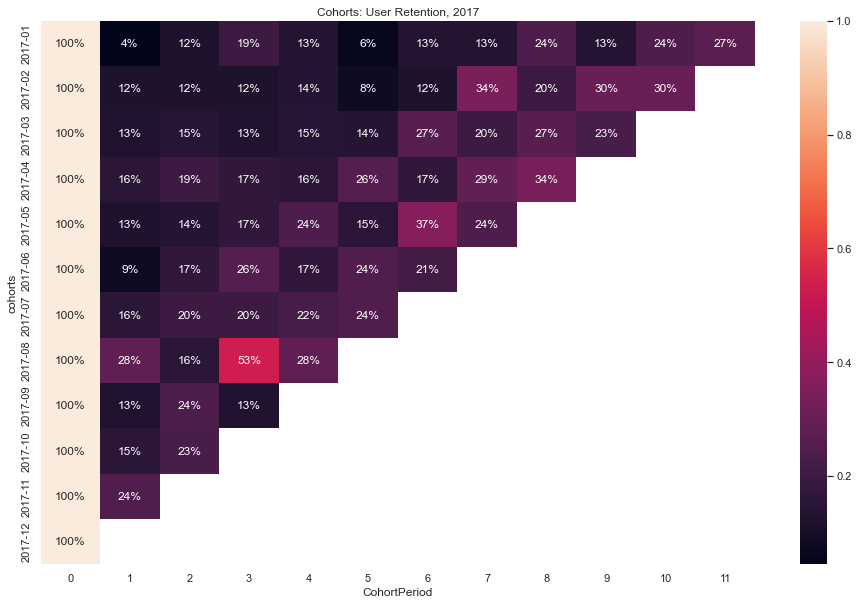

In [69]:
cohorts_2017= orders_2017.groupby('customer_id',as_index=False)['order_month'].min()
cohorts_2017.columns = ['customer_id', 'cohorts']
df_2017 = pd.merge(orders_2017, cohorts_2017 , how='left', on='customer_id')
cohorts_group_2017 = df_2017.groupby(['cohorts', 'order_month']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2017.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2017 = cohorts_group_2017.groupby(level=0).apply(cohort_period)
cohorts_group_2017.reset_index(inplace=True)
cohorts_group_2017.set_index(['cohorts', 'CohortPeriod'], inplace=True) 
cohort_group_size_2017 = cohorts_group_2017['TotalUsers'].groupby(level=0).first()
user_retention_2017 = cohorts_group_2017['TotalUsers'].unstack(0).divide(cohort_group_size_2017, axis=1)
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention, 2017')
sns.heatmap(user_retention_2017.T, mask=user_retention_2017.T.isnull(), annot=True, fmt='.0%');

Вроде картина улучшается. Чтобы проверить, сравним 2016 и 2017 год. 
Возьмем такую метрику: посчитаем количество ячеек в таблице когорт, когда user retention в 2017 году был больше, чем в 2016.

In [126]:
score = 0
cnt = 66

In [127]:
for k in range(1,12):
    for j in range (0,12):
        if isinstance(user_retention_2017.iloc[k][j], float):
            if user_retention_2017.iloc[k][j] > user_retention_2016.iloc[k][j]:
                score += 1

In [128]:
score / cnt 

0.7727272727272727

Получилось больше 0.5, делаем вывод, что 2017 год лучше, чем 2016.

Теперь проведем когортный анализ по годам, а не по месяцам.

In [110]:
orders['order_year'] = orders['order_date'].dt.strftime('%Y') 

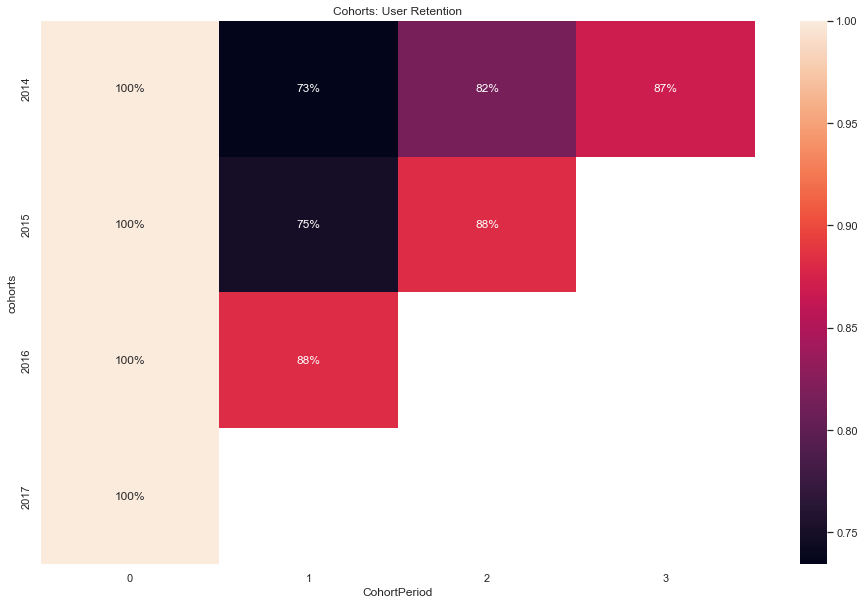

In [112]:
cohorts= orders.groupby('customer_id',as_index=False)['order_year'].min()
cohorts.columns = ['customer_id', 'cohorts']
df = pd.merge(orders, cohorts, how='left', on='customer_id')
cohorts_group = df.groupby(['cohorts', 'order_year']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['cohorts', 'CohortPeriod'], inplace=True) 
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

Получается, что в послений год наблюдений user retention увеличился.